In [14]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook

from tensorflow.keras.preprocessing.image import img_to_array, load_img

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = "./data/DL/yelp_photos/yelp_photos/"
with open(os.path.join(data_path, "photos.json")) as file:
    labels_dict = {}
    for line in file:
        json_data = json.loads(line)
        labels_dict[json_data['photo_id']] = json_data['label']

In [3]:
label_df = pd.DataFrame(list(labels_dict.items()), columns=['Photo_ID', 'Label'])
label_df

,Photo_ID,Label
0,zsvj7vloL4L5jhYyPIuVwg,inside
1,HCUdRJHHm_e0OCTlZetGLg,outside
2,vkr8T0scuJmGVvN2HJelEA,drink
3,pve7D6NUrafHW3EAORubyw,food
4,H52Er-uBg6rNrHcReWTD2w,food
...,...,...
200093,4Zia9NkAfQNjMfcIDhwJ-g,food
200094,KB96KRZRhRm8hUkI-OpGEA,inside
200095,Klmojvaf2_2dP1XKzTsFmQ,food
200096,FNEiq7Mogec7t31OaU5juw,drink


Label
food       108152
inside      56029
outside     18569
drink       15670
menu         1678
Name: count, dtype: int64


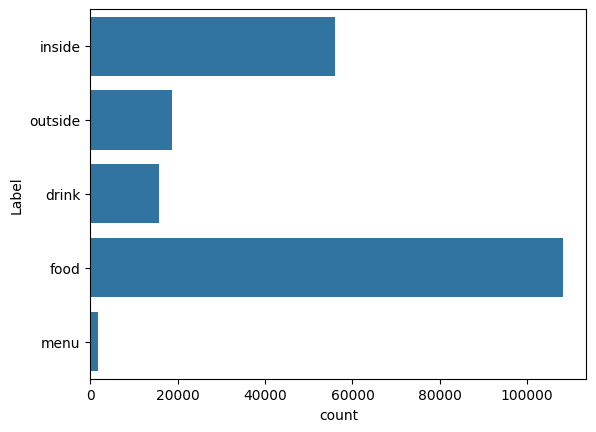

In [4]:
counts = label_df['Label'].value_counts()
print(counts)
sns.countplot(label_df['Label']);

In [5]:
min_samples = counts.min()
label_df_smaller = label_df.groupby('Label').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)

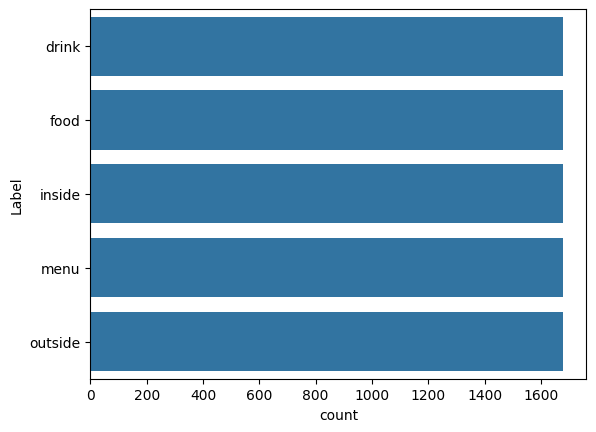

In [6]:
sns.countplot(label_df_smaller['Label']);

In [11]:
target_size = (224, 224)
images = []
labels = []
skipped = []

for index, row in tqdm_notebook(label_df_smaller.iterrows(), total=len(label_df_smaller)):
    img_path = os.path.join(data_path, 'photos', f"{row['Photo_ID']}.jpg")
    try:
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(row['Label'])
    except:
        skipped.append(img_path)

images = np.array(images) / 127.5 - 1.0  # Normalize images to [-1, 1]
labels = np.array(labels)

print(f"Total images processed: {images.shape}")
print(f"Total images skipped: {len(skipped)}")

  0%|          | 0/8390 [00:00<?, ?it/s]

Total images processed: (8390, 224, 224, 3)
Total images skipped: 0


In [12]:
# Saving images to a file
np.save('images.npy', images)

# Saving labels to a file
np.save('labels.npy', labels)

print("Files saved successfully.")


Files saved successfully.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8901961..1.0].


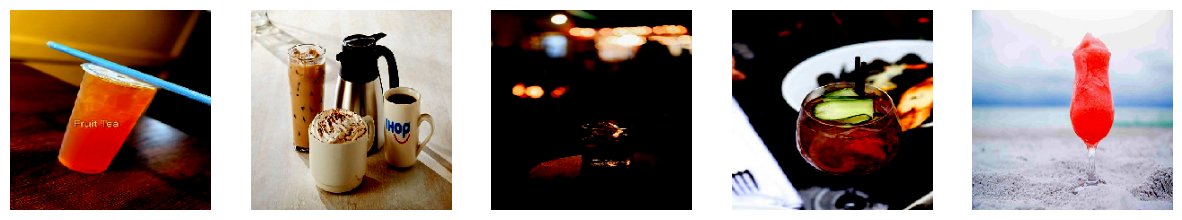

In [13]:
# Plot the images
num_images = 5
fig, axs = plt.subplots(1, num_images, figsize=(15, 15))
for i in range(num_images):
    axs[i].imshow(images[i, :, :, :])  # Display RGB images
    axs[i].axis('off')
plt.show()

In [15]:
# Loading images from file
images = np.load('images.npy')

# Loading labels from file
labels = np.load('labels.npy')

print(f"Images loaded: {images.shape}")
print(f"Labels loaded: {labels.shape}")

Images loaded: (8390, 224, 224, 3)
Labels loaded: (8390,)


In [16]:
labels_unique = np.unique(labels)
print(f"Unique labels: {labels_unique}")

Unique labels: ['drink' 'food' 'inside' 'menu' 'outside']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Total images for class 'menu': (1678, 224, 224, 3)


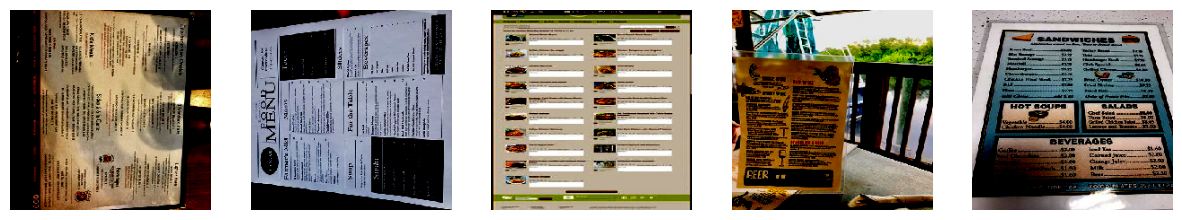

In [21]:
# Separate images by class
selected_class = 'menu'  # Replace with the actual class label you want to use
class_indices = np.where(labels == selected_class)[0]
class_images = images[class_indices]

print(f"Total images for class '{selected_class}': {class_images.shape}")

# Plot the images
num_images = 5
fig, axs = plt.subplots(1, num_images, figsize=(15, 15))
for i in range(num_images):
    axs[i].imshow(class_images[i, :, :, :])  # Display RGB images
    axs[i].axis('off')
plt.show()